<a href="https://colab.research.google.com/github/mdymek/PSI_projekt/blob/master/PSI_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diagnoza przewlekłej choroby nerek

Celem projektu jest zbudowanie i porównanie kilku modeli diagnozy przewlekłej choroby nerek na podstawie [zbioru danych](https://www.kaggle.com/mansoordaku/ckdisease) udostępnionego przez UCI Machine Learning Repository.


> Plan pracy:
> 1. Proces przetwarzania danych.
> 2. Proces modelowania (znajdowania optymalnych parametrów).
> 3. Porównanie modeli.
> 4. Wizualizacja wyników.
> 5. Podsumowanie pracy

In [645]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random

from google.colab import files
uploaded = files.upload()

Saving kidney_disease.csv to kidney_disease (14).csv


In [660]:
data = pd.read_csv('kidney_disease.csv', index_col=0)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


Opis danych (zgodnie z dostępnym na [stronie](https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease)).

Kolumny:
> `age` - wiek pacjenta
> `bp` - ciśnienie krwi
> `sg` - gęstość względna (stosunek gęstości bezwzględnej ciała pacjenta do ciała wzorcowego)  
> `al` - poziom albumin  
> `su` - poziom cukru  
> `rbc` - poziom czerwonych krwinek  
> `pc` - ilość martwych neutrofili  
> `pcc` - obecność zbitych mas ropnych  
> `ba` - obecność bakterii  
> `bgr` - poziom cukru w losowym teście  
> `bu` - stężenie azotu mocznika we krwi  
> `sc` - stężenie kreatyniny w surowicy  
> `sod` - poziom sodu  
> `pot` - poziom potasu    
> `hemo` - poziom hemoglobiny    
> `pcv` - wskaźnikiem hematokrytowym  
> `wc` - ilość białych krwinek  
> `rc` - ilość czerwonych krwinek  
> `htn` - nadciśnienie    
> `dm` - cukrzyca  
> `cad` - choroba niedokrwienna serca  
> `appet` - apetyt    
> `pe` - obrzęk    
> `ane` - anemia  


# Przetwarzanie danych.

Przeanalizujmy wartości w poszczególnych kolumnach.

In [661]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

Zmapujmy wartości obiektowe (stringowe) na odpowiednie wartości liczbowe:

In [662]:
print("=== RBC\n", data["rbc"].value_counts(), "\n===\n")
print("=== PC\n", data["pc"].value_counts(), "\n===\n")
print("=== PCC\n", data["pcc"].value_counts(), "\n===\n")
print("=== BA\n", data["ba"].value_counts(), "\n===\n")
print("=== PCV\n", data["pcv"].value_counts(), "\n===\n")

=== RBC
 normal      201
abnormal     47
Name: rbc, dtype: int64 
===

=== PC
 normal      259
abnormal     76
Name: pc, dtype: int64 
===

=== PCC
 notpresent    354
present        42
Name: pcc, dtype: int64 
===

=== BA
 notpresent    374
present        22
Name: ba, dtype: int64 
===

=== PCV
 52      21
41      21
48      19
44      19
40      16
43      14
42      13
45      13
33      12
36      12
32      12
50      12
28      12
34      11
37      11
30       9
35       9
29       9
46       9
31       8
39       7
24       7
26       6
38       5
54       4
53       4
51       4
49       4
47       4
22       3
27       3
25       3
23       2
19       2
18       1
14       1
\t?      1
20       1
21       1
16       1
\t43     1
9        1
15       1
17       1
Name: pcv, dtype: int64 
===



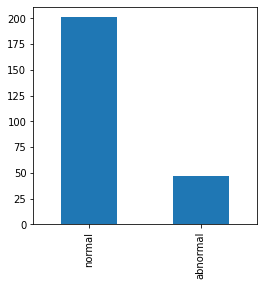

In [669]:
ax = data["rbc"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

data["rbc"] = data.rbc.replace({"normal":0, "abnormal":1})

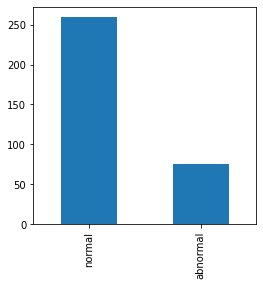

In [670]:
ax = data["pc"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

data["pc"] = data.pc.replace({"normal":0, "abnormal":1})

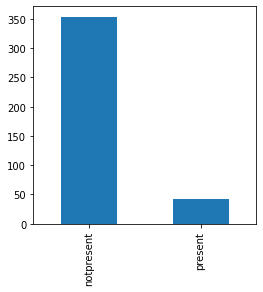

In [671]:
ax = data["pcc"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

data["pcc"] = data.pcc.replace({"notpresent":0, "present":1})

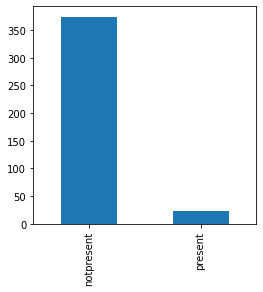

In [672]:
ax = data["ba"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

data["ba"] = data.ba.replace({"notpresent":0, "present":1})

Dla pcv widzimy źle sparsowaną wartość 43 i źle sparsowanego NaNa.

In [0]:
data["pcv"] = data.pcv.replace({"\t43":43, "\t?":np.NaN})

In [680]:
print("=== RBC\n", data["rbc"].value_counts(), "\n===\n")
print("=== PC\n", data["pc"].value_counts(), "\n===\n")
print("=== PCC\n", data["pcc"].value_counts(), "\n===\n")
print("=== BA\n", data["ba"].value_counts(), "\n===\n")
print("=== PCV\n", data["pcv"].value_counts(), "\n===\n")

=== RBC
 0.0    201
1.0     47
Name: rbc, dtype: int64 
===

=== PC
 0.0    259
1.0     76
Name: pc, dtype: int64 
===

=== PCC
 0.0    354
1.0     42
Name: pcc, dtype: int64 
===

=== BA
 0.0    374
1.0     22
Name: ba, dtype: int64 
===

=== PCV
 52    21
41    21
48    19
44    19
40    16
43    14
45    13
42    13
33    12
28    12
36    12
50    12
32    12
37    11
34    11
46     9
35     9
30     9
29     9
31     8
24     7
39     7
26     6
38     5
54     4
53     4
51     4
49     4
47     4
22     3
27     3
25     3
23     2
19     2
18     1
20     1
21     1
16     1
43     1
9      1
15     1
17     1
14     1
Name: pcv, dtype: int64 
===



Takich źle sparsowanych NaNów może być więcej; zmapujmy je na właściwą wartość.

In [0]:
data = data.replace("\t?", np.NaN)

In [682]:
print("=== WC\n", data["wc"].value_counts(), "\n===\n")
print("=== RC\n", data["rc"].value_counts(), "\n===\n")
print("=== HTN\n", data["htn"].value_counts(), "\n===\n")
print("=== DM\n", data["dm"].value_counts(), "\n===\n")
print("=== CAD\n", data["cad"].value_counts(), "\n===\n")
print("=== APPET\n", data["appet"].value_counts(), "\n===\n")
print("=== PE\n", data["pe"].value_counts(), "\n===\n")
print("=== ANE\n", data["ane"].value_counts(), "\n===\n")
print("=== CLASSIFICATION\n", data["classification"].value_counts(), "\n===\n")

=== WC
 9800     11
6700     10
9200      9
7200      9
9600      9
         ..
9700      1
16700     1
21600     1
9900      1
11300     1
Name: wc, Length: 91, dtype: int64 
===

=== RC
 5.2    18
4.5    16
4.9    14
4.7    11
4.8    10
3.9    10
3.4     9
4.6     9
3.7     8
6.1     8
5.0     8
5.9     8
5.5     8
5.3     7
5.8     7
5.4     7
3.8     7
4.2     6
5.6     6
4.3     6
4.1     5
5.7     5
6.4     5
3.2     5
6.2     5
6.5     5
4.4     5
5.1     5
3.6     4
6.3     4
6.0     4
4       3
3.5     3
3.3     3
4.0     3
2.6     2
2.7     2
2.5     2
2.1     2
5       2
2.8     2
2.9     2
3.0     2
3.1     2
3       1
2.4     1
2.3     1
8.0     1
Name: rc, dtype: int64 
===

=== HTN
 no     251
yes    147
Name: htn, dtype: int64 
===

=== DM
 no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64 
===

=== CAD
 no      362
yes      34
\tno      2
Name: cad, dtype: int64 
===

=== APPET
 good    317
poor     82
Name: appet, dtype: int64 
==

In [0]:
data["htn"] = data.htn.replace({"no":0, "yes":1})
data["dm"] = data.dm.replace({"no":0, "\tno":0, "yes":1, " yes":1, "\tyes" : 1})
data["cad"] = data.cad.replace({"no":0, "\tno":0, "yes":1})
data["appet"] = data.appet.replace({"good":0, "poor":1})
data["pe"] = data.pe.replace({"no":0, "yes":1})
data["ane"] = data.ane.replace({"no":0, "yes":1})
data["classification"] = data.classification.replace({"notckd":0, "ckd":1, "ckd\t":1})

In [684]:
print("=== WC\n", data["wc"].value_counts(), "\n===\n")
print("=== RC\n", data["rc"].value_counts(), "\n===\n")
print("=== HTN\n", data["htn"].value_counts(), "\n===\n")
print("=== DM\n", data["dm"].value_counts(), "\n===\n")
print("=== CAD\n", data["cad"].value_counts(), "\n===\n")
print("=== APPET\n", data["appet"].value_counts(), "\n===\n")
print("=== PE\n", data["pe"].value_counts(), "\n===\n")
print("=== ANE\n", data["ane"].value_counts(), "\n===\n")
print("=== CLASSIFICATION\n", data["classification"].value_counts(), "\n===\n")

=== WC
 9800     11
6700     10
9200      9
7200      9
9600      9
         ..
9700      1
16700     1
21600     1
9900      1
11300     1
Name: wc, Length: 91, dtype: int64 
===

=== RC
 5.2    18
4.5    16
4.9    14
4.7    11
4.8    10
3.9    10
3.4     9
4.6     9
3.7     8
6.1     8
5.0     8
5.9     8
5.5     8
5.3     7
5.8     7
5.4     7
3.8     7
4.2     6
5.6     6
4.3     6
4.1     5
5.7     5
6.4     5
3.2     5
6.2     5
6.5     5
4.4     5
5.1     5
3.6     4
6.3     4
6.0     4
4       3
3.5     3
3.3     3
4.0     3
2.6     2
2.7     2
2.5     2
2.1     2
5       2
2.8     2
2.9     2
3.0     2
3.1     2
3       1
2.4     1
2.3     1
8.0     1
Name: rc, dtype: int64 
===

=== HTN
 0.0    251
1.0    147
Name: htn, dtype: int64 
===

=== DM
 0.0    261
1.0    137
Name: dm, dtype: int64 
===

=== CAD
 0.0    364
1.0     34
Name: cad, dtype: int64 
===

=== APPET
 0.0    317
1.0     82
Name: appet, dtype: int64 
===

=== PE
 0.0    323
1.0     76
Name: pe, dtype: int64 
==

Zmodyfikujmy typy kolumn:

In [0]:
data = data.apply(pd.to_numeric)

## Przyjrzyjmy się problemowi missing data.

In [686]:
data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

Najwięcej brakujących pozycji mamy w kolumnach `rbc`, `wc` i `rc`, a następnie `sod` i `pot`.

In [687]:
data[data["wc"].isnull()]["rc"].isnull().sum()

105

Praktycznie we wszystkich przypadkach, kiedy brakuje wartości `wc`, brakuje również `rc`. Z tego powodu zdecydowałam się pominać te wiersze, żeby nie zmniejszyć za bardzo rzetelności danych.

In [688]:
data = data[data["wc"].notna()]
data.shape[0]

294

Analogicznie dla kolumn `sod` i `pot` oraz `rbc` i `pc`.

In [689]:
print(data[data["sod"].isnull()].shape[0])
print(data[data["sod"].isnull()]["pot"].isnull().sum())

47
47


In [690]:
data = data[data["sod"].notna()]
data.shape[0]

247

In [691]:
data.isnull().sum()

age                4
bp                 4
sg                18
al                18
su                18
rbc               58
pc                30
pcc                4
ba                 4
bgr               12
bu                 6
sc                 3
sod                0
pot                1
hemo               4
pcv                4
wc                 0
rc                 9
htn                2
dm                 2
cad                2
appet              1
pe                 1
ane                1
classification     0
dtype: int64

In [692]:
print(data[data["rbc"].isnull()].shape[0])
print(data[data["rbc"].isnull()]["pc"].isnull().sum())

58
24


In [693]:
data = data[data["rbc"].notna()]
data.shape[0]

189

In [694]:
data.isnull().sum()

age                2
bp                 3
sg                 2
al                 3
su                 3
rbc                0
pc                 6
pcc                3
ba                 3
bgr               10
bu                 6
sc                 3
sod                0
pot                0
hemo               3
pcv                2
wc                 0
rc                 6
htn                2
dm                 2
cad                2
appet              1
pe                 1
ane                1
classification     0
dtype: int64

Pozostało niewiele wartości nullowych. Żeby bardziej nie zmniejszać naszego zbioru, wypełnimy je danymi:
1. Dla kolumn z wartościami (`age`, `bp`, `sg`, `al`, `su`, `bgr`, `bu`, `sc`, `sod`, `pot`, `hemo`, `pcv`, `wc`, `rc`) użyjemy średniej z danej kolumny.
2. Dla kolumn (`rbc`, `pc`,`pcc`, `ba`, `htn`, `dm`, `cad`, `appet`, `pe`, `ane`) użyjemy losowej wartośi z kolumny.

In [695]:
for column in ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']:
  data[column].fillna((data[column].mean()), inplace=True)

for column in ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']:
  data[column].fillna(random.choice(data[data[column] != np.nan][column].to_numpy()), inplace =True)

data.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

I na koniec zmieńmy typy kolumn obiektowych na liczbowe:

In [0]:
data = data.astype({"rbc": int, "pc": int, "pcc": int, "ba": int, "pcv": int, "wc": int, "rc": float, "htn":int,
                    "dm": int, "cad": int, "appet": int, "pe": int, "ane": int, "classification": int})

In [697]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 3 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             189 non-null    float64
 1   bp              189 non-null    float64
 2   sg              189 non-null    float64
 3   al              189 non-null    float64
 4   su              189 non-null    float64
 5   rbc             189 non-null    int64  
 6   pc              189 non-null    int64  
 7   pcc             189 non-null    int64  
 8   ba              189 non-null    int64  
 9   bgr             189 non-null    float64
 10  bu              189 non-null    float64
 11  sc              189 non-null    float64
 12  sod             189 non-null    float64
 13  pot             189 non-null    float64
 14  hemo            189 non-null    float64
 15  pcv             189 non-null    int64  
 16  wc              189 non-null    int64  
 17  rc              189 non-null    flo

Co kończy proces przetwarzania danych.


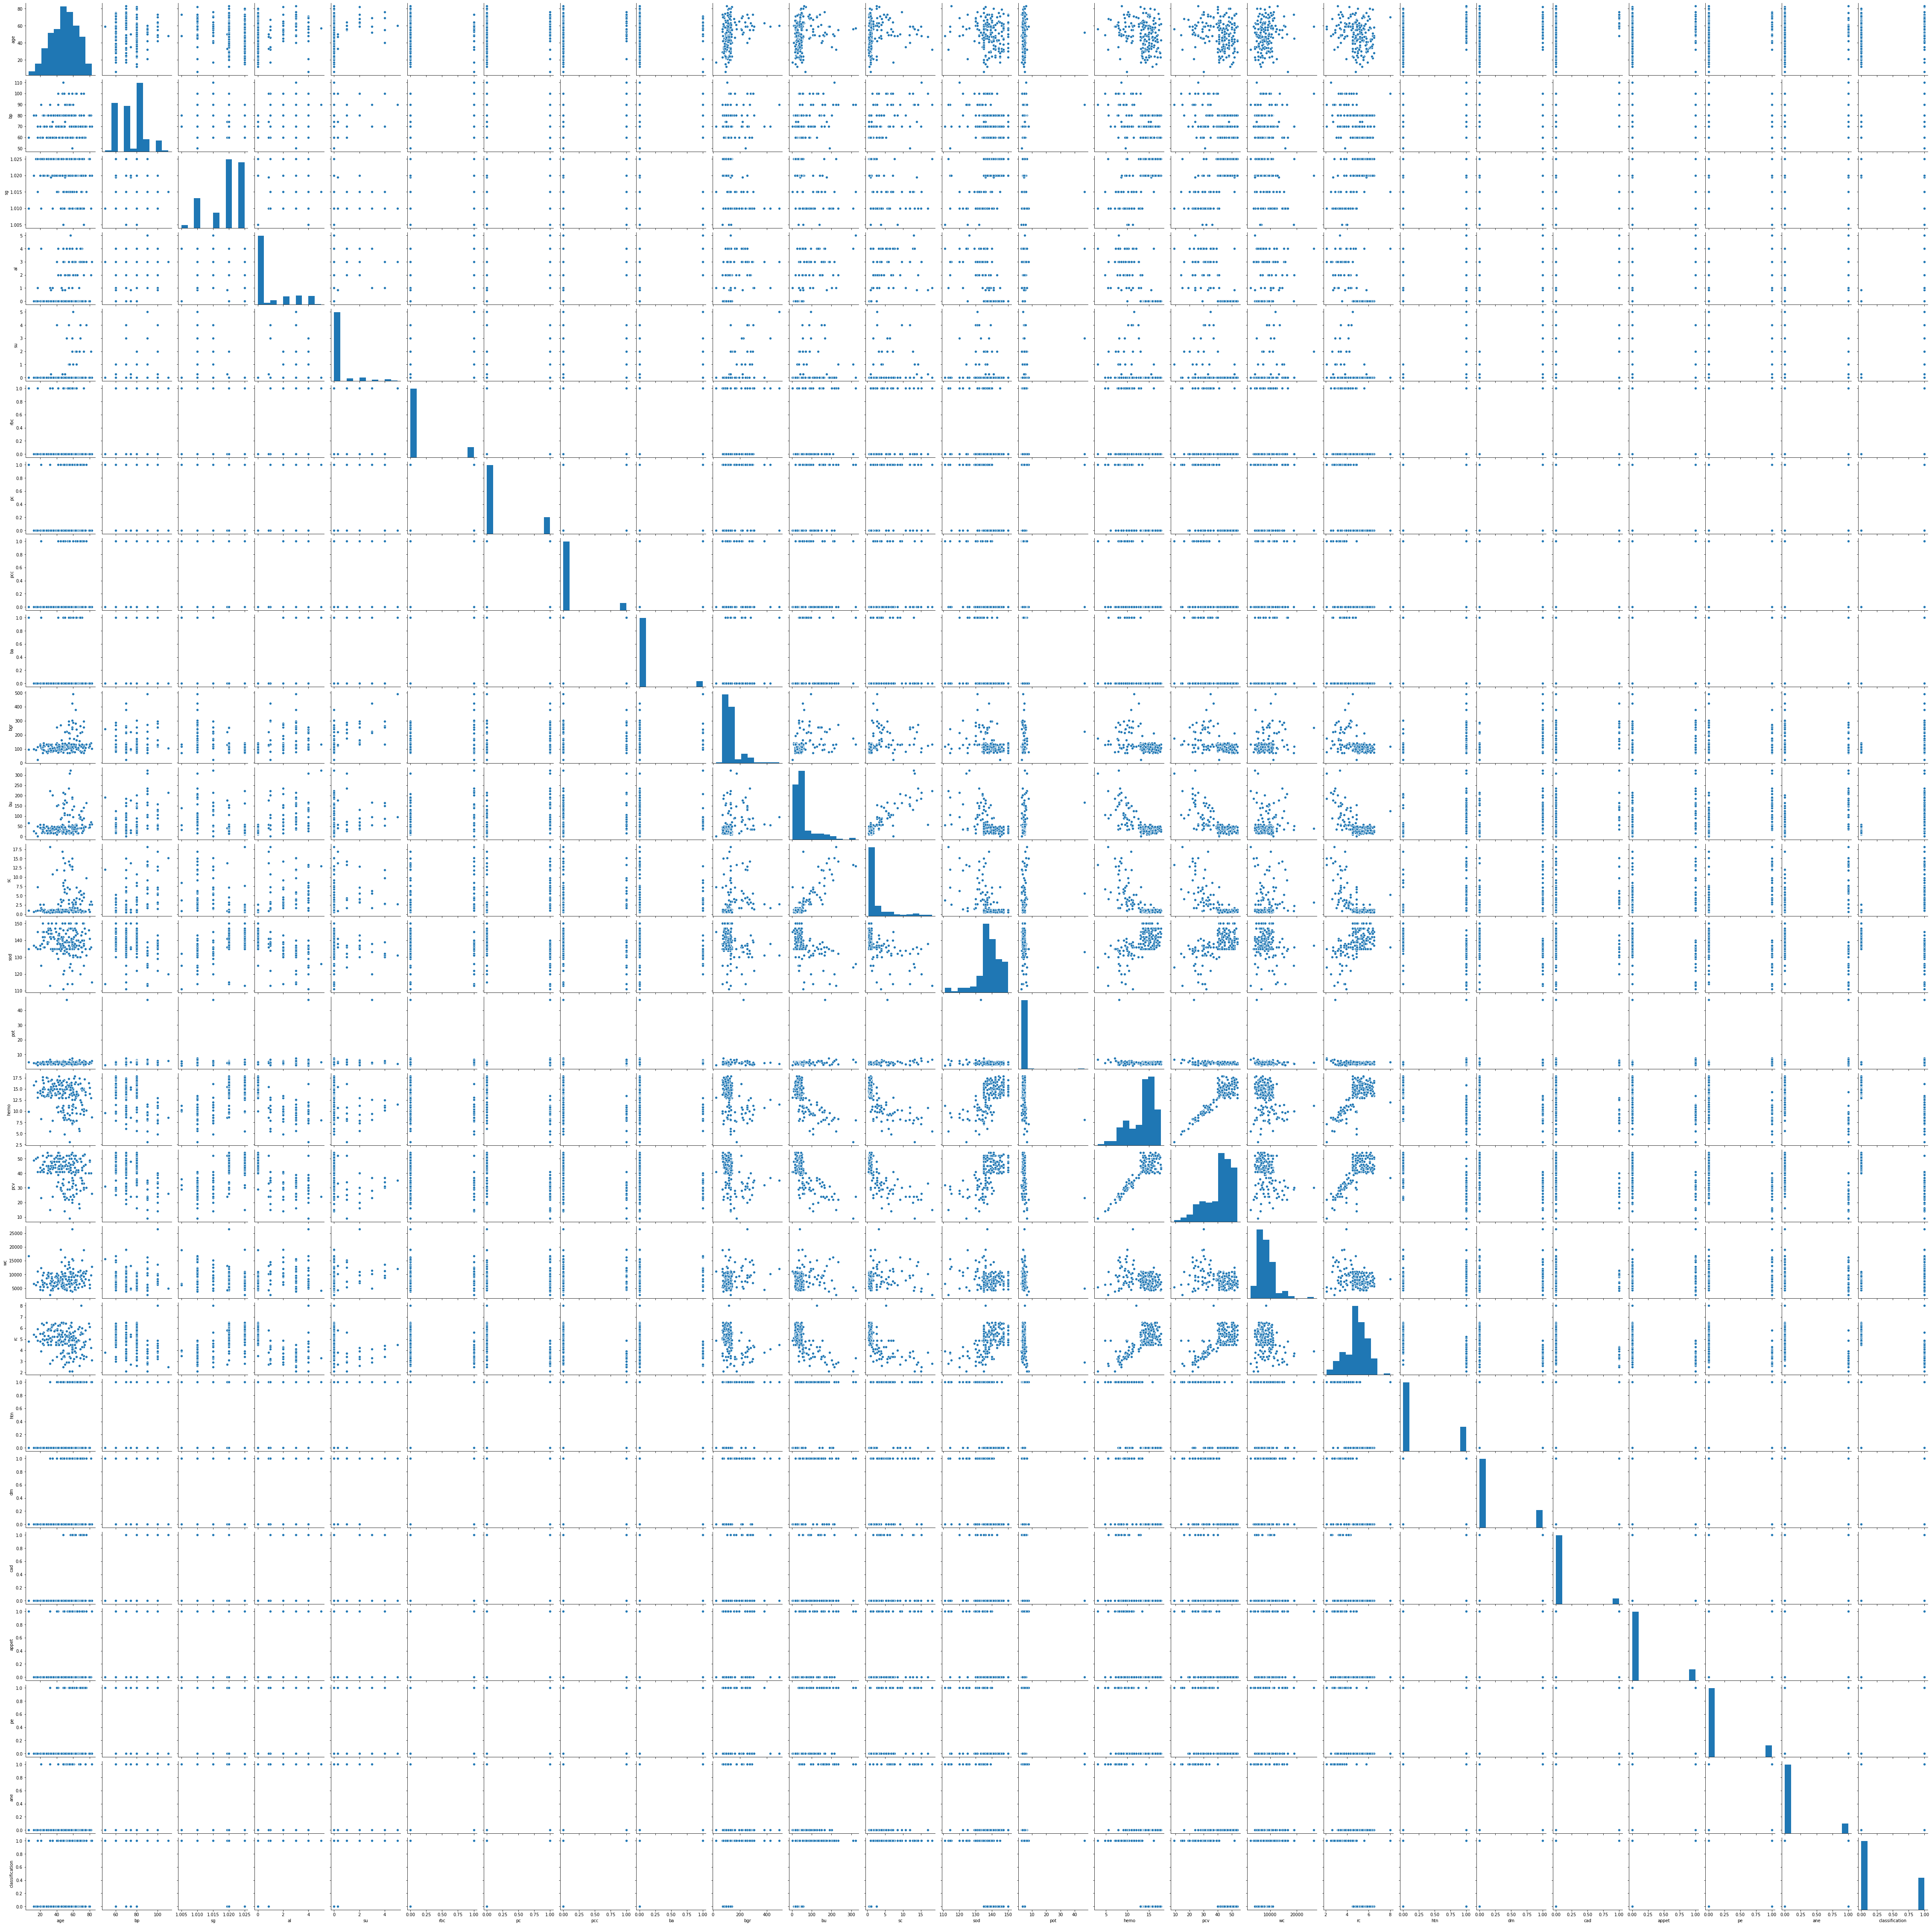

In [699]:
import seaborn as sns

sns.pairplot(data)#, kind="reg"
plt.show()

In [708]:
corr = data.loc[:, df.columns != "classification"].corr()
corr

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
age,1.000000,0.042272,-0.274692,0.245739,0.246695,0.054376,0.165918,0.135437,0.059472,0.290275,0.158537,0.118716,-0.115474,0.013199,-0.193098,-0.191652,0.156061,-0.218018,0.366305,0.297132,0.277309,0.151592,0.217500,0.109851
bp,0.042272,1.000000,-0.210624,0.339627,0.242529,0.343131,0.212233,0.131083,0.211974,0.170952,0.326800,0.395332,-0.244620,0.112782,-0.334780,-0.372363,0.016142,-0.268190,0.311216,0.228216,0.229559,0.173247,0.157371,0.305071
sg,-0.274692,-0.210624,1.000000,-0.695266,-0.417369,-0.423026,-0.555251,-0.424792,-0.447140,-0.493276,-0.469238,-0.503670,0.492742,-0.051895,0.654530,0.640605,-0.279466,0.583134,-0.610193,-0.631716,-0.356175,-0.461436,-0.495054,-0.331766
al,0.245739,0.339627,-0.695266,1.000000,0.467278,0.462648,0.741489,0.474330,0.537419,0.471545,0.632154,0.607477,-0.591799,0.184471,-0.744179,-0.725162,0.273850,-0.629181,0.754948,0.648914,0.407074,0.604695,0.573542,0.502484
su,0.246695,0.242529,-0.417369,0.467278,1.000000,0.153365,0.274075,0.188170,0.284251,0.662864,0.251516,0.274527,-0.212062,0.230676,-0.321002,-0.336132,0.241512,-0.359627,0.528207,0.547966,0.472404,0.191898,0.312105,0.091365
rbc,0.054376,0.343131,-0.423026,0.462648,0.153365,1.000000,0.492666,0.146938,0.256196,0.355148,0.443074,0.439872,-0.352267,-0.021103,-0.487201,-0.455245,0.046576,-0.380725,0.354562,0.443064,0.256196,0.401304,0.343837,0.295498
pc,0.165918,0.212233,-0.555251,0.741489,0.274075,0.492666,1.000000,0.612170,0.471446,0.395628,0.578572,0.504379,-0.540035,0.164240,-0.692357,-0.670212,0.117848,-0.605592,0.620962,0.584258,0.369614,0.577215,0.598817,0.509729
pcc,0.135437,0.131083,-0.424792,0.474330,0.188170,0.146938,0.612170,1.000000,0.321182,0.260888,0.306977,0.261643,-0.421217,-0.026022,-0.451272,-0.449110,0.159502,-0.424186,0.383886,0.331940,0.321182,0.446047,0.331133,0.375428
ba,0.059472,0.211974,-0.447140,0.537419,0.284251,0.256196,0.471446,0.321182,1.000000,0.277461,0.231267,0.190820,-0.236170,-0.000470,-0.363226,-0.340817,0.120370,-0.321367,0.293685,0.311782,0.305714,0.238961,0.346410,0.141902
bgr,0.290275,0.170952,-0.493276,0.471545,0.662864,0.355148,0.395628,0.260888,0.277461,1.000000,0.266298,0.253898,-0.269926,0.104784,-0.387389,-0.400572,0.218094,-0.382485,0.537608,0.605361,0.384697,0.276274,0.281672,0.118033


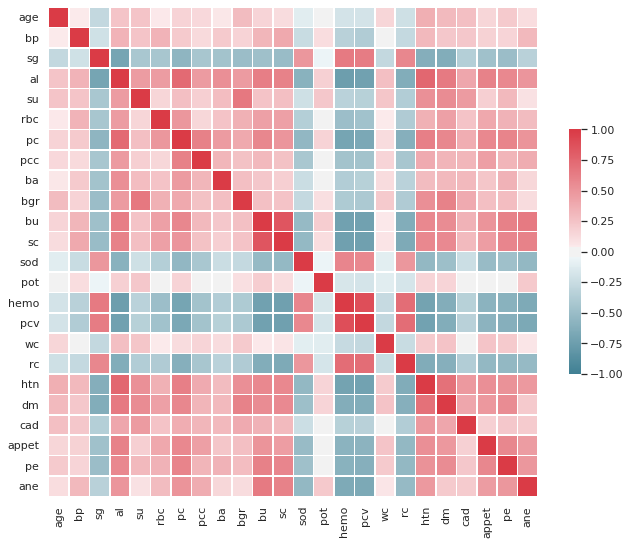

In [709]:
sns.set(style="darkgrid")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1,
            square=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

Możemy zaobserwować korelację pomiędzy stężeniem mocznika (`bu`) a stężeniem kreatyninu w surowicy (`sc`), oraz pomiędzy poziomem hemoglobiny (`hemo`) a 
wskaźnikiem hematokrytowym (`pcv`).

Widać także odwrotną korelację pomiędzy poziomem tych pierwszych a tych drugich.

# Modelowanie danych.